In [31]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['figure.figsize'] = (10,5)
#plt.rcParams['figure.dpi'] = 250
#sns.set_style('darkgrid')

In [32]:
df = pd.read_csv('EastWestAirlines.csv')

In [33]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [35]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [36]:
df.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [37]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

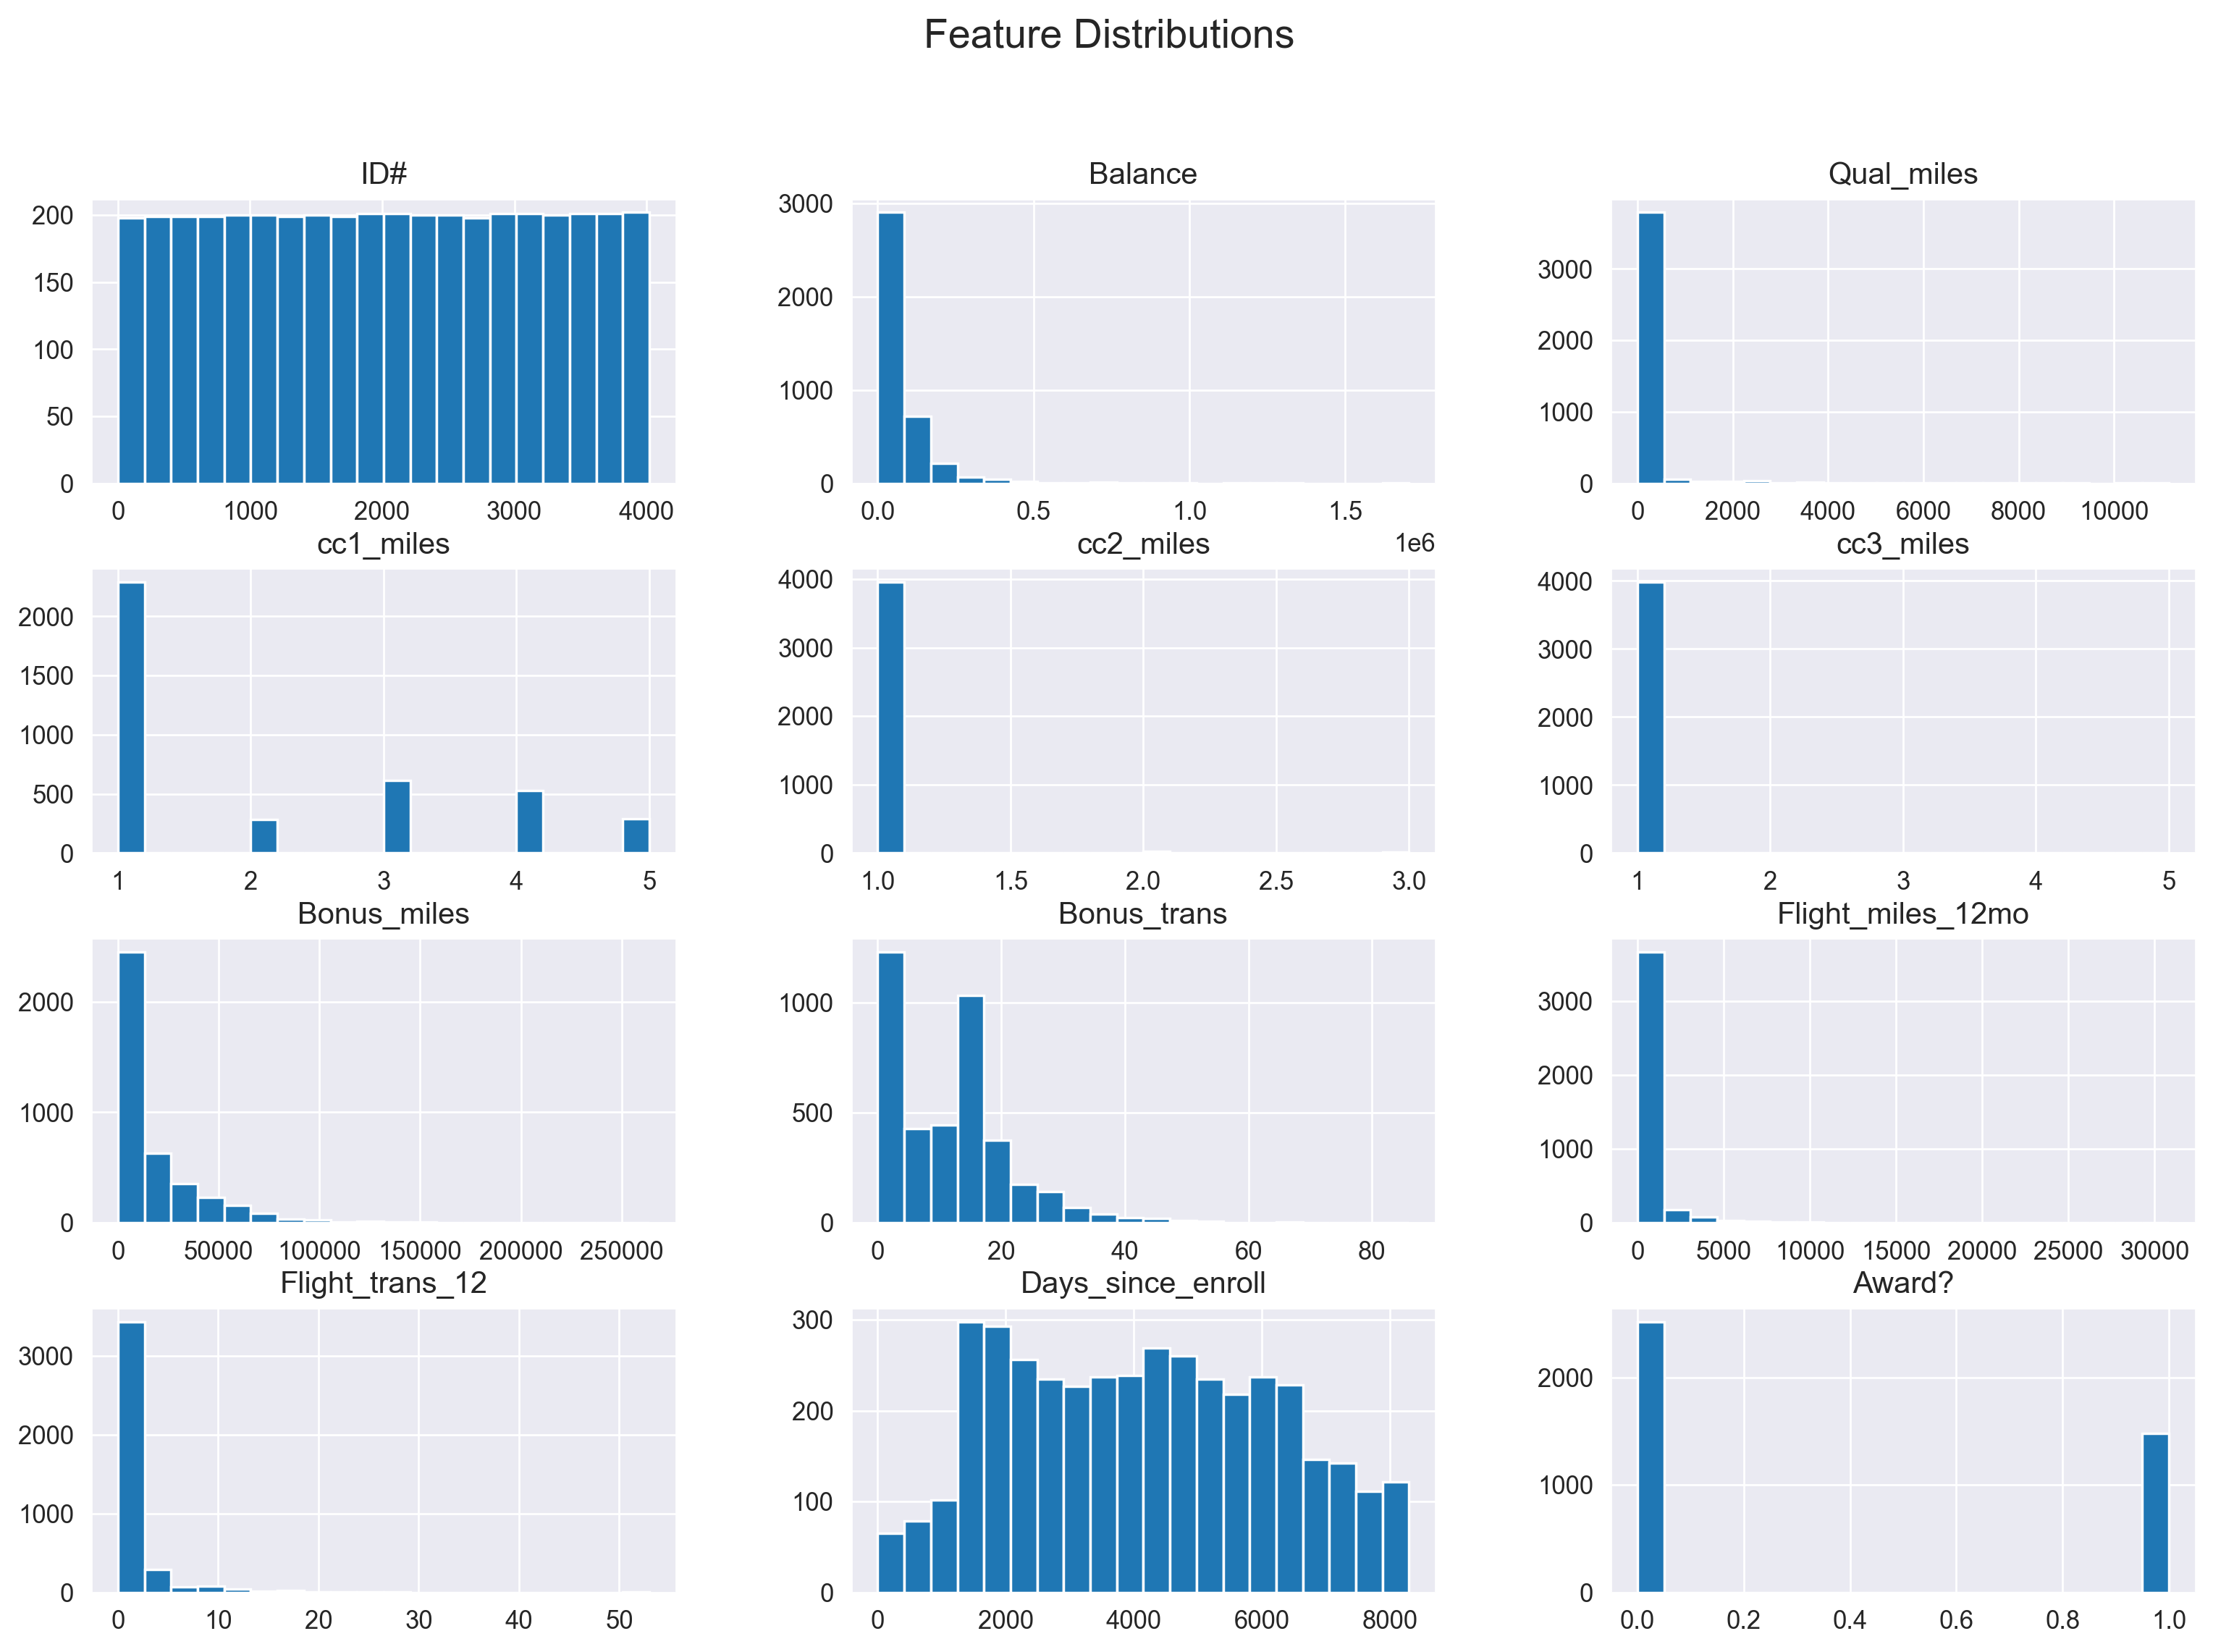

In [38]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [39]:
sns.pairplot(df)

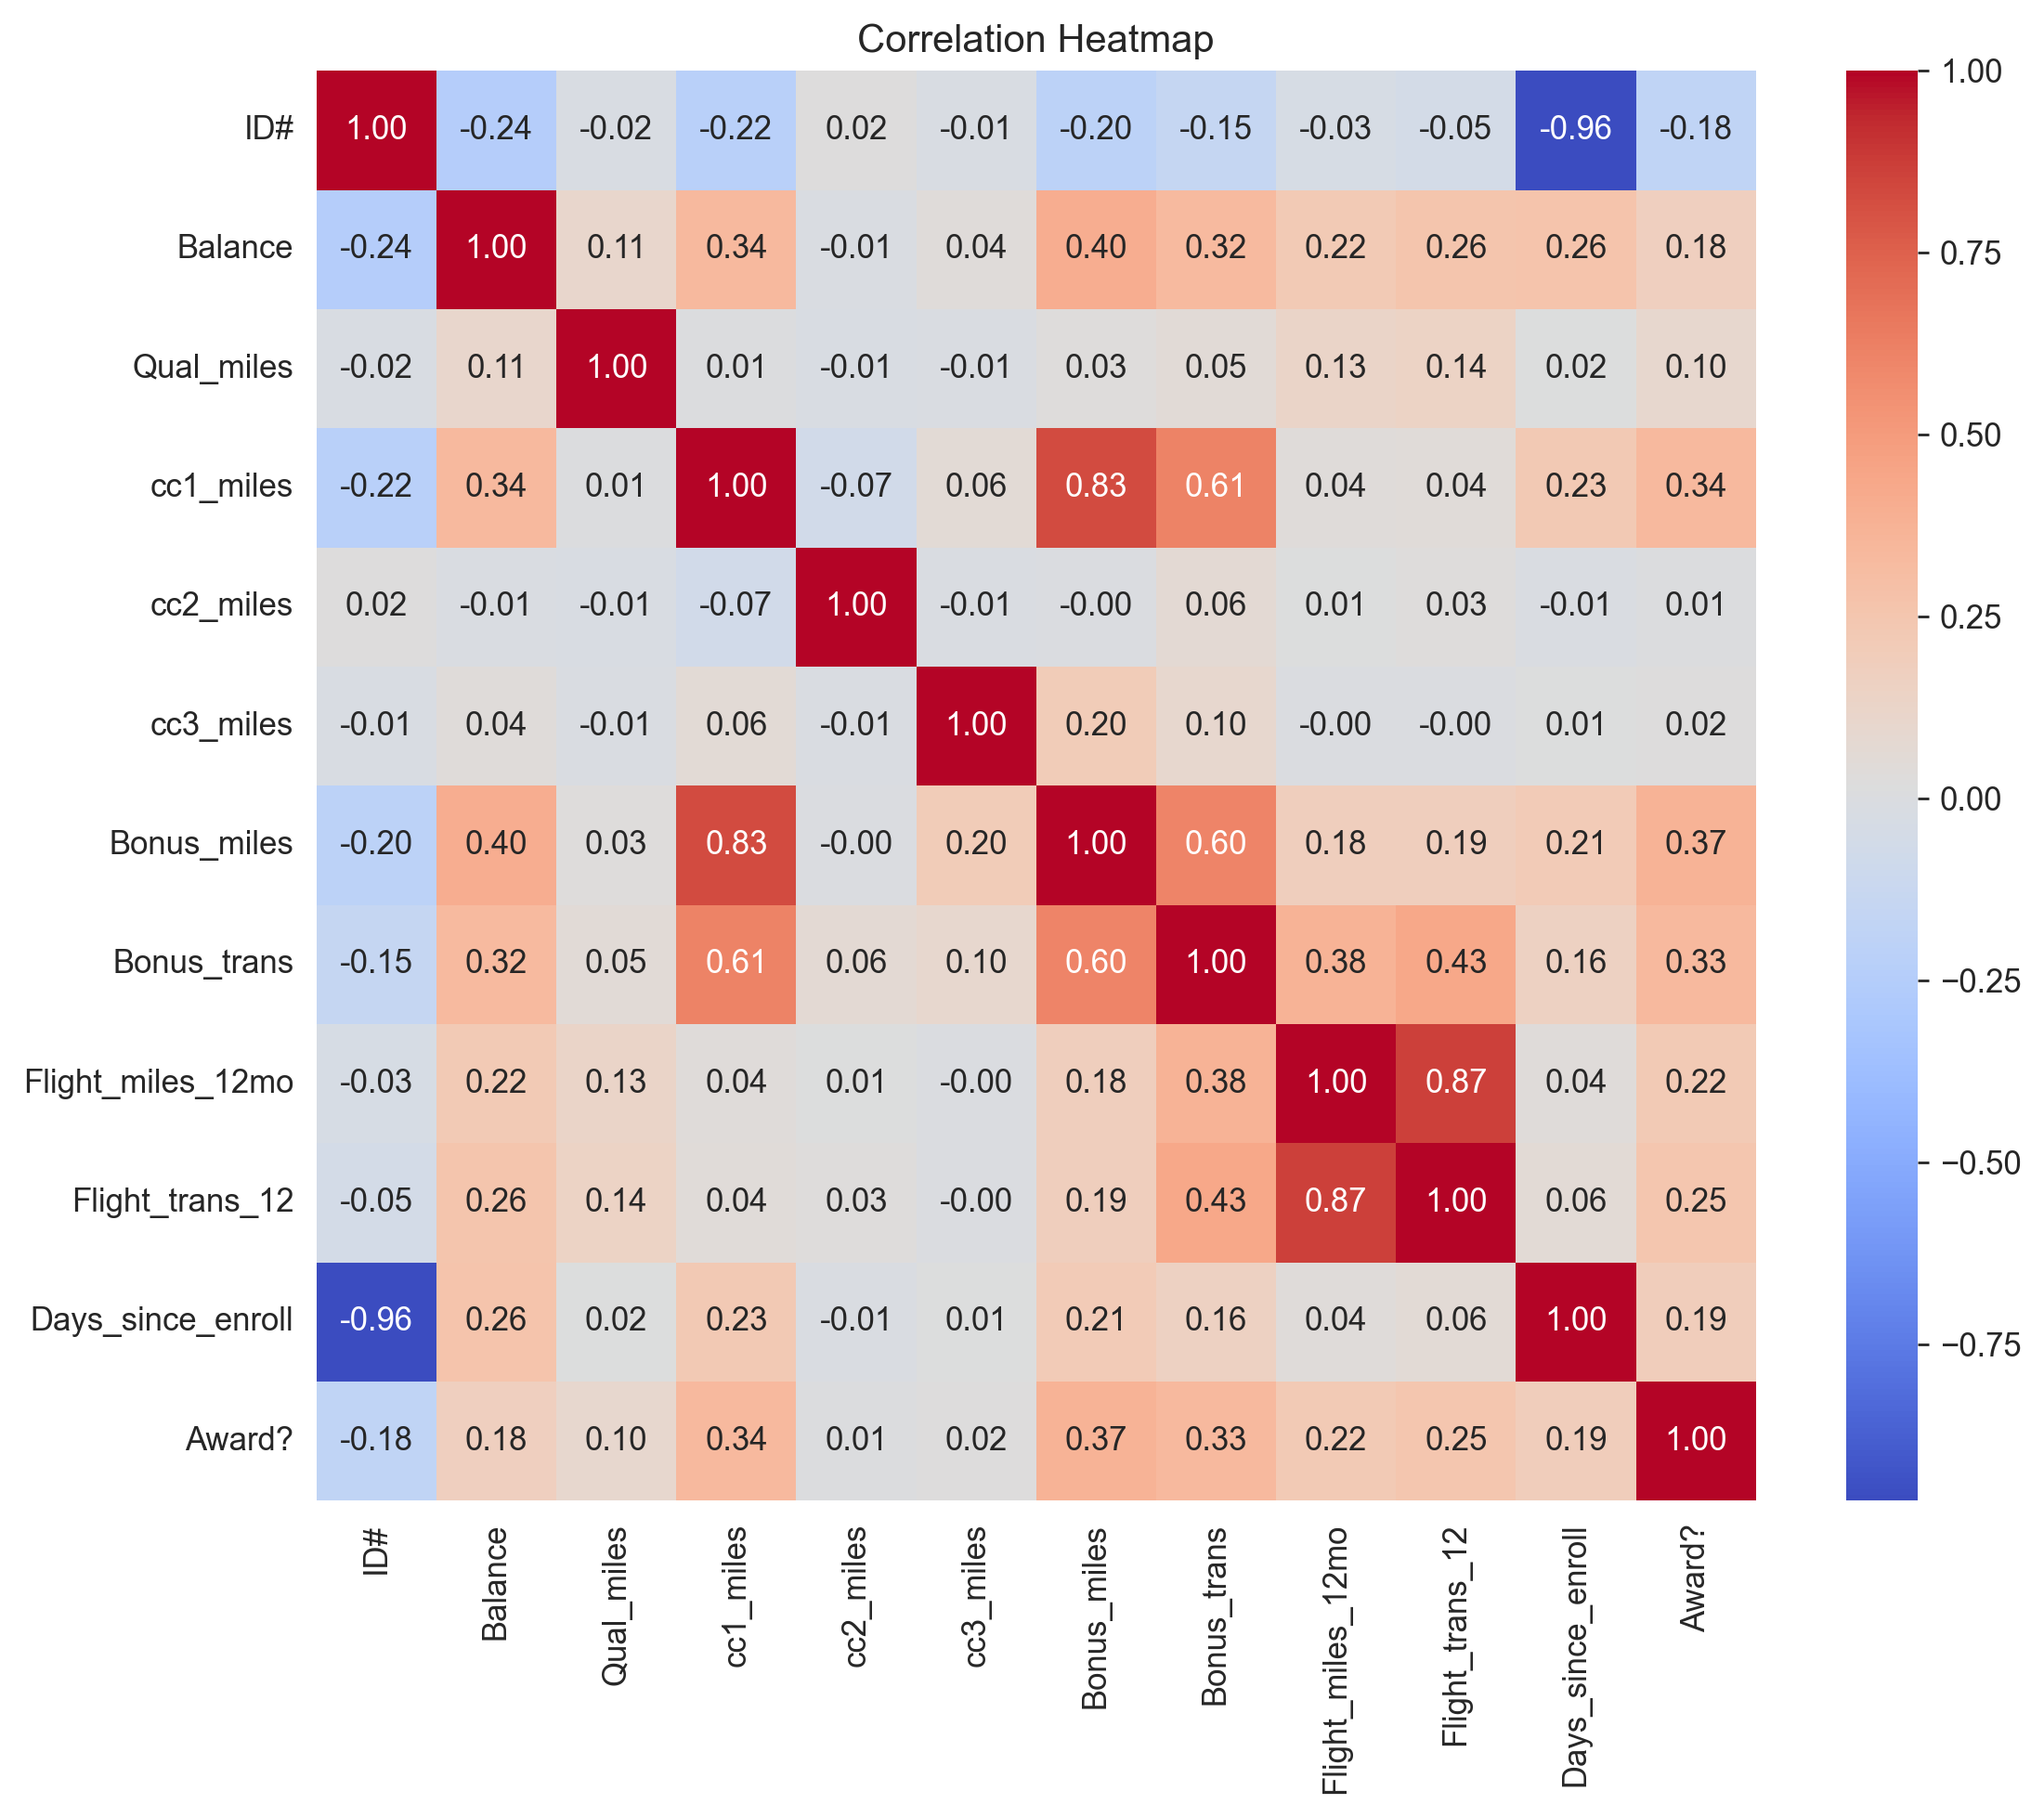

In [40]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df.corr()

ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
ID#                1.000000 -0.243737   -0.019374  -0.224465   0.020291   
Balance           -0.243737  1.000000    0.108722   0.338344  -0.008804   
Qual_miles        -0.019374  0.108722    1.000000   0.007931  -0.013923   
cc1_miles         -0.224465  0.338344    0.007931   1.000000  -0.068223   
cc2_miles          0.020291 -0.008804   -0.013923  -0.068223   1.000000   
cc3_miles         -0.014707  0.035243   -0.007779   0.060555  -0.006166   
Bonus_miles       -0.203012  0.403487    0.031021   0.825200  -0.003969   
Bonus_trans       -0.146915  0.324935    0.050725   0.608943   0.064399   
Flight_miles_12mo -0.031013  0.217551    0.126774   0.037370   0.010598   
Flight_trans_12   -0.052096  0.255700    0.144004   0.041333   0.028284   
Days_since_enroll -0.964988  0.263129    0.017312   0.230849  -0.005807   
Award?            -0.177901  0.178494    0.095256   0.335457   0.005332   

                   cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
ID#                -0.014707    -0.203012    -0.146915          -0.031013   
Balance             0.035243     0.403487     0.324935           0.217551   
Qual_miles         -0.007779     0.031021     0.050725           0.126774   
cc1_miles           0.060555     0.825200     0.608943           0.037370   
cc2_miles          -0.006166    -0.003969     0.064399           0.010598   
cc3_miles           1.000000     0.204134     0.097313          -0.001777   
Bonus_miles         0.204134     1.000000     0.603180           0.183536   
Bonus_trans         0.097313     0.603180     1.000000           0.377216   
Flight_miles_12mo  -0.001777     0.183536     0.377216           1.000000   
Flight_trans_12    -0.001117     0.185261     0.432364           0.869193   
Days_since_enroll   0.010832     0.210397     0.161262           0.037271   
Award?              0.023484     0.373506     0.333893           0.217715   

                   Flight_trans_12  Days_since_enroll    Award?  
ID#                      -0.052096          -0.964988 -0.177901  
Balance                   0.255700           0.263129  0.178494  
Qual_miles                0.144004           0.017312  0.095256  
cc1_miles                 0.041333           0.230849  0.335457  
cc2_miles                 0.028284          -0.005807  0.005332  
cc3_miles                -0.001117           0.010832  0.023484  
Bonus_miles               0.185261           0.210397  0.373506  
Bonus_trans               0.432364           0.161262  0.333893  
Flight_miles_12mo         0.869193           0.037271  0.217715  
Flight_trans_12           1.000000           0.059260  0.247909  
Days_since_enroll         0.059260           1.000000  0.188121  
Award?                    0.247909           0.188121  1.000000

In [42]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['ID#', 'Award?']))

In [43]:
scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

<Axes: xlabel='Bonus_miles', ylabel='Qual_miles'>

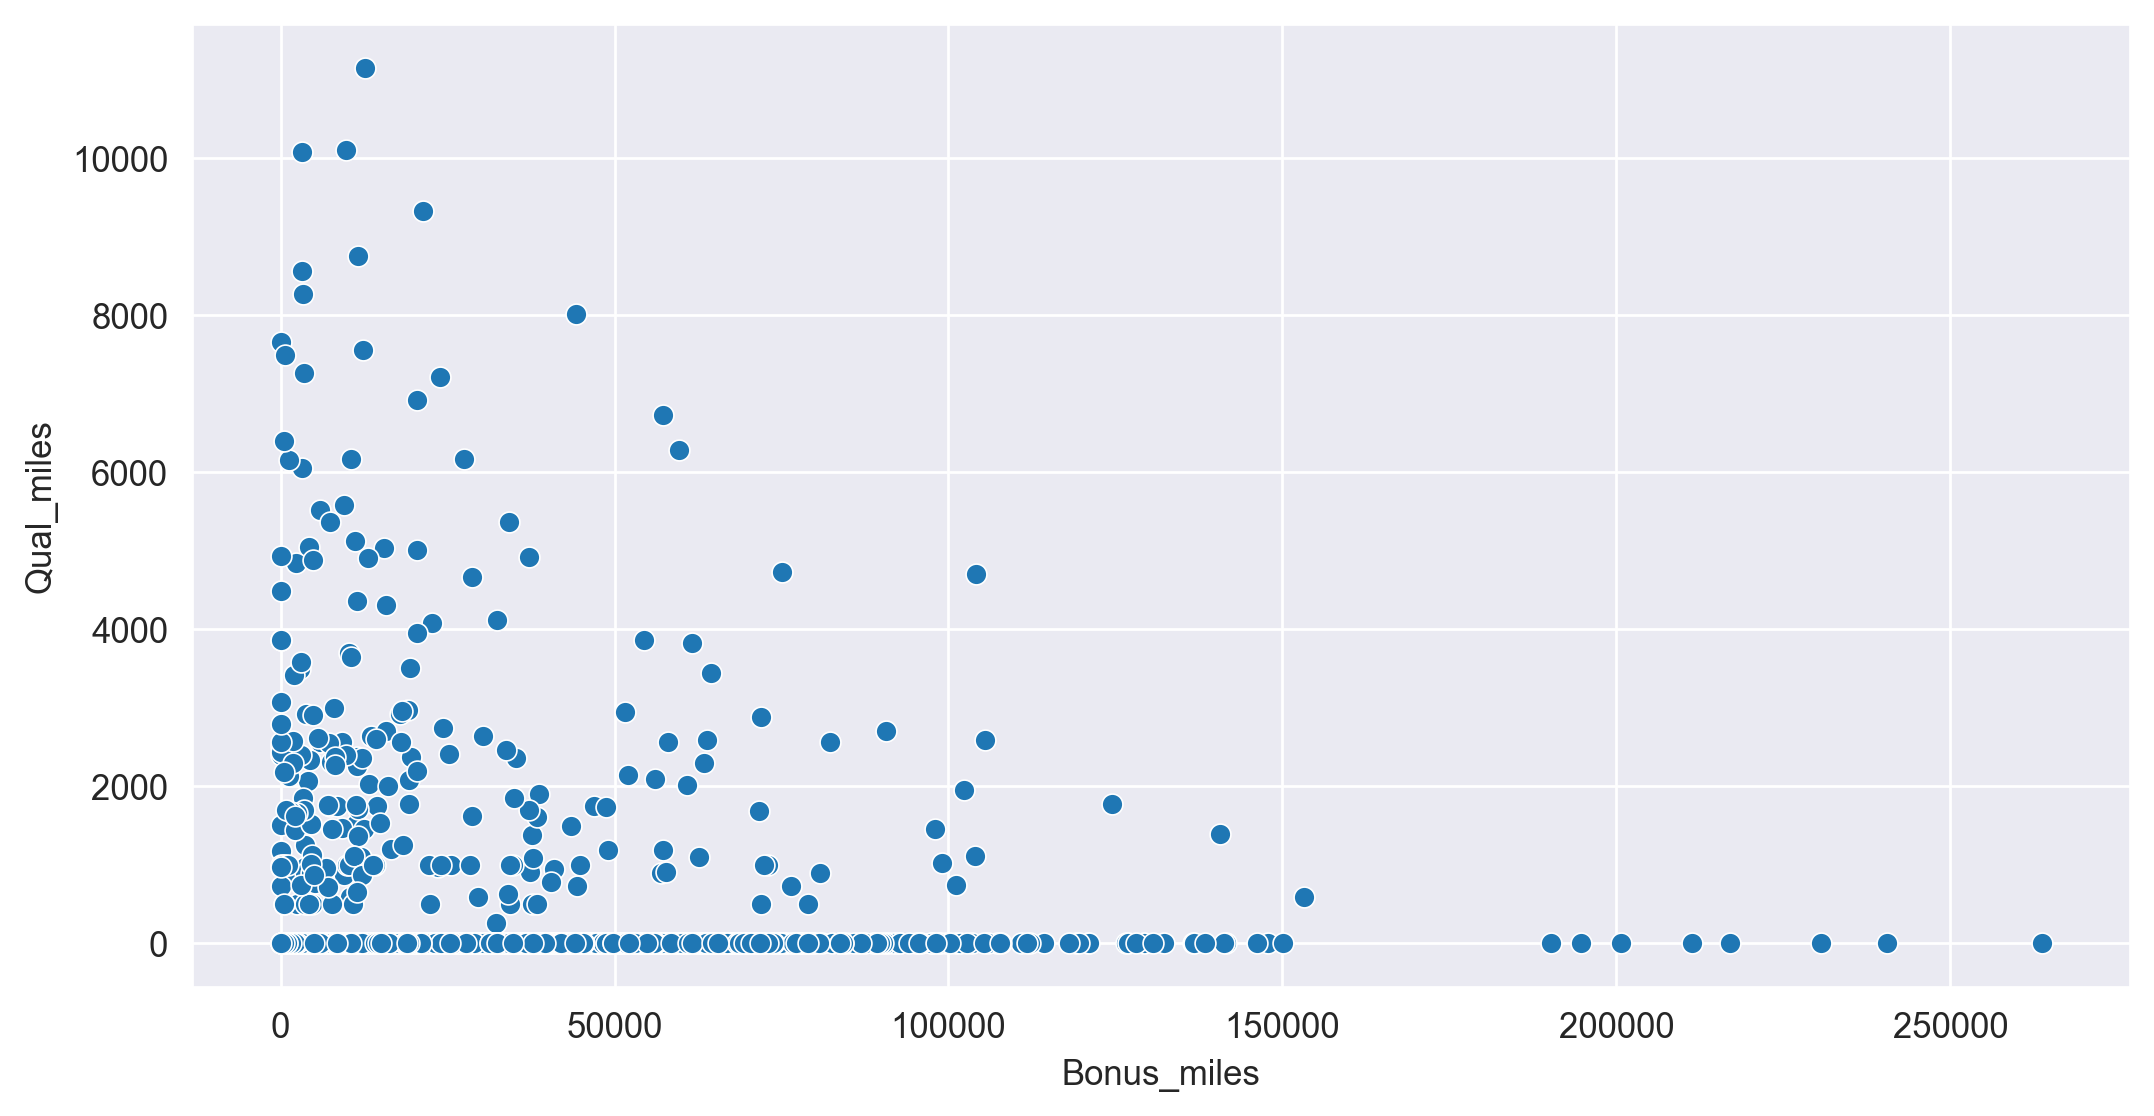

In [45]:
sns.scatterplot(x = df['Bonus_miles'], y = df['Qual_miles'])

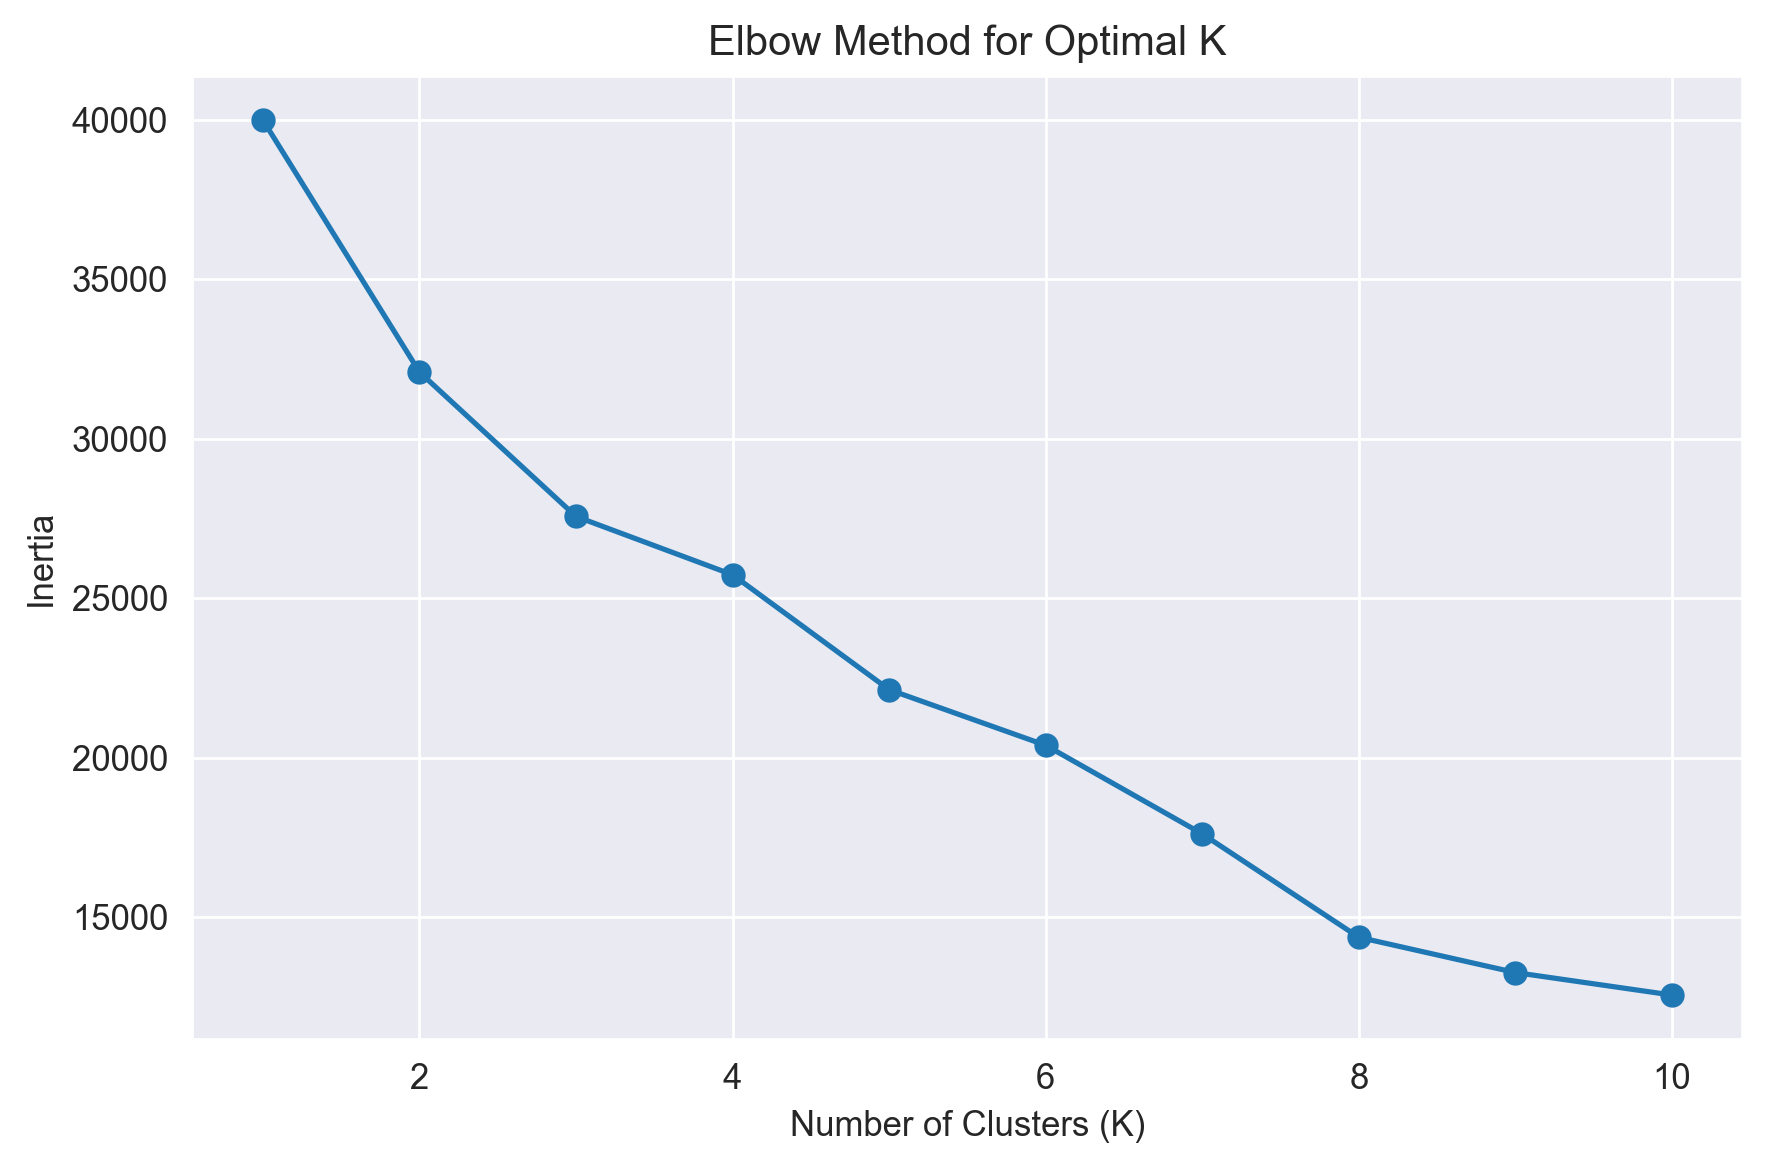

Silhouette Score for K-Means: 0.33170243934542987


In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method to find optimal K
distortions = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means with optimal K (choose based on the elbow curve)
optimal_k = 3  # Replace this value with the elbow-determined K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df['KMeans_Cluster'] = kmeans_labels

# Evaluate clustering
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

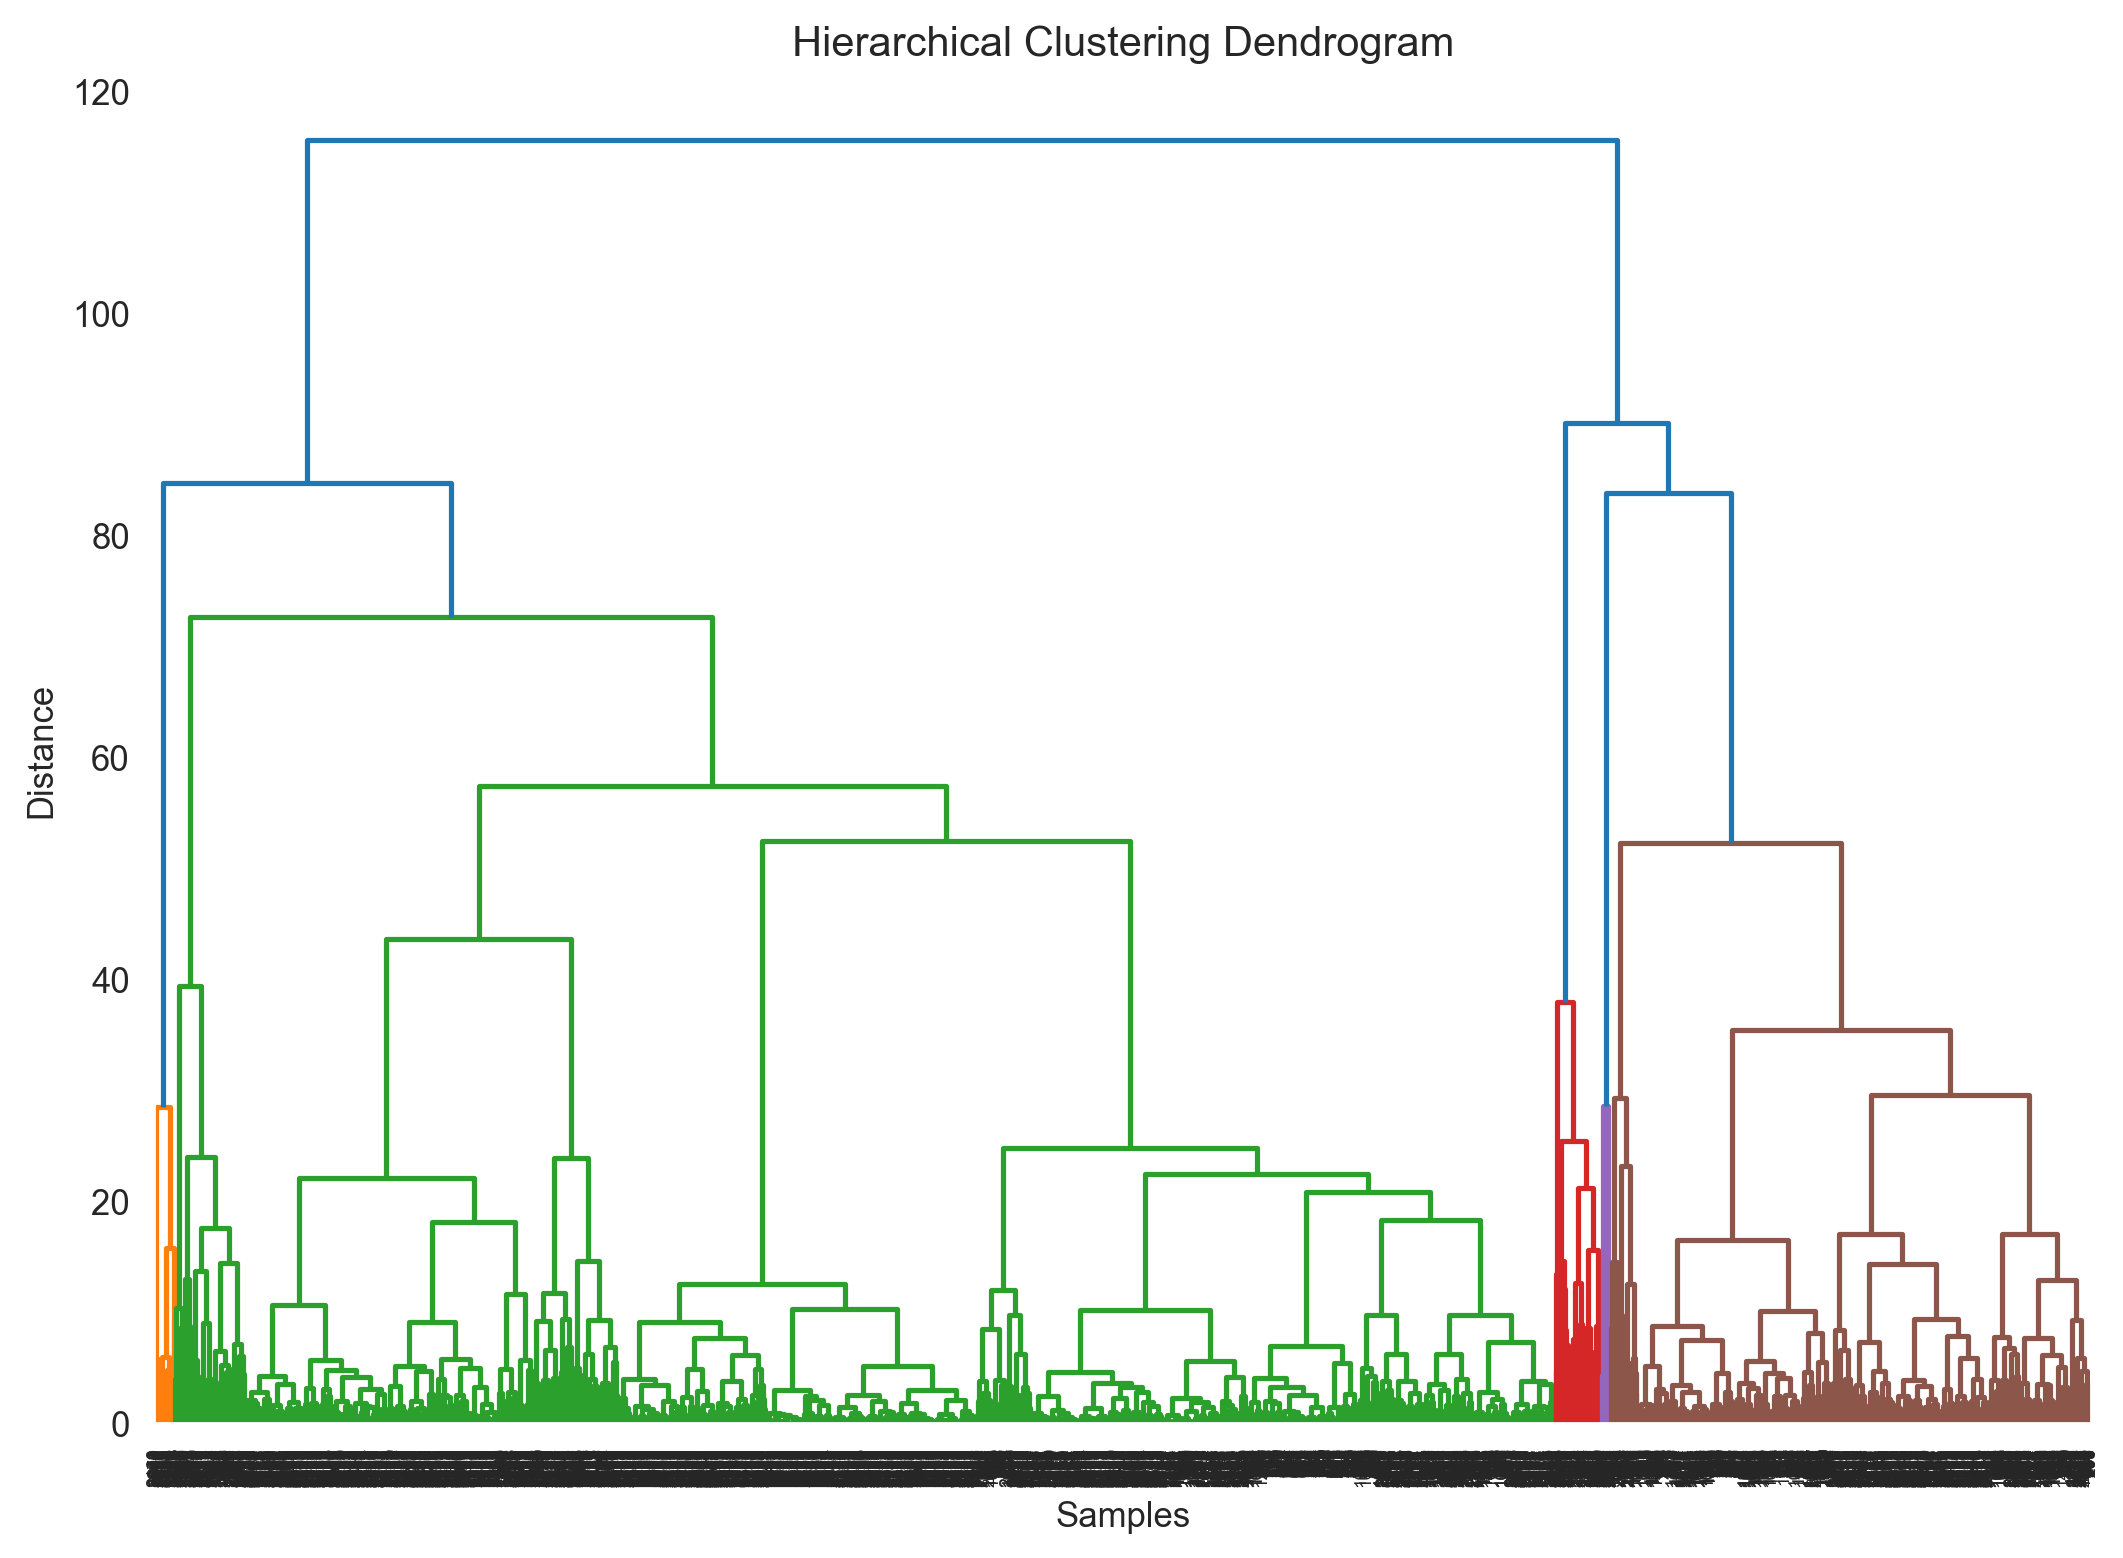

Silhouette Score for Hierarchical Clustering: 0.31619409882758315


In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')  # 'ward', 'complete', 'average', 'single'

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df['Hierarchical_Cluster'] = hierarchical_labels

# Evaluate clustering
silhouette_hierarchical = silhouette_score(scaled_data, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

In [52]:
from sklearn.cluster import DBSCAN


# Apply DBSCAN (experiment with eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Evaluate clustering (exclude noise points labeled as -1)
silhouette_dbscan = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else 'Not Applicable'
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for DBSCAN: 0.10802454017973835


In [57]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(scaled_data)
ypred

array([2, 2, 2, ..., 0, 0, 0])

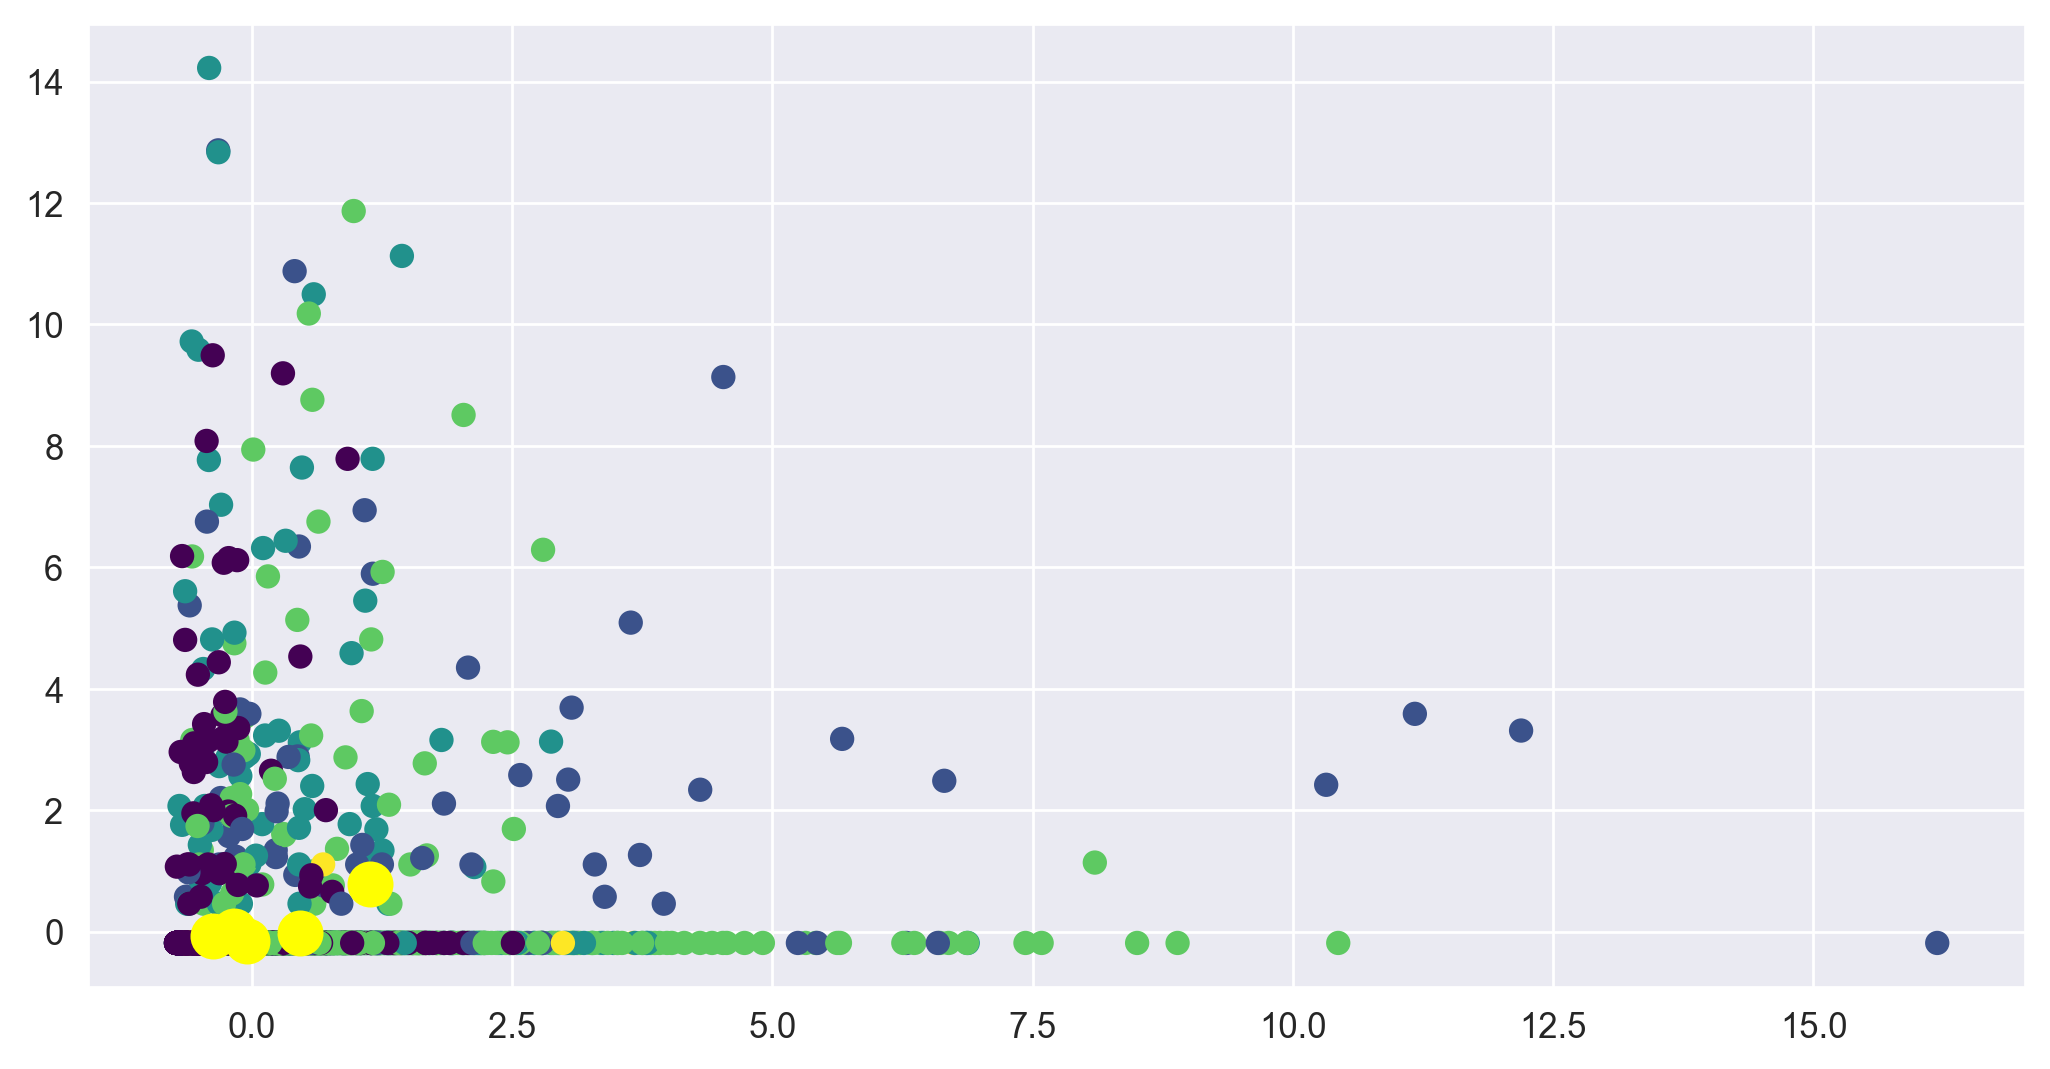

In [59]:
plt.scatter(scaled_data[:,0],scaled_data[:,1], c = ypred, cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 150)

K-Means: Use the Elbow Method to determine optimal 

K, apply clustering, and calculate the silhouette score.

Hierarchical: Generate a dendrogram to explore possible clusters, apply clustering, and calculate the silhouette score.

DBSCAN: Experiment with eps and min_samples to optimize clusters, handle noise points, and calculate the silhouette score.

Visualization: Use PCA for 2D visualization of clusters for all three methods.